### DEMSLV05

# Cournot Equilibrium Model

In [1]:
from demos.setup import np, plt, demo
from compecon import NLP, gridmake
%matplotlib inline

### Parameters and initial value

In [2]:
alpha = 0.6
beta = np.array([0.6, 0.8])

### Set up the Cournot function

In [3]:
def cournot(q):
    qsum = q.sum()
    P = qsum ** (-alpha)
    P1 = -alpha * qsum **(-alpha-1)
    P2 = -alpha * (-alpha - 1) * qsum ** (-alpha-2)
    fval = P + (P1 - beta) * q
    fjac = np.diag(2 * P1 + P2 * q - beta) + np.fliplr(np.diag(P1 + P2 * q))
    return fval, fjac

### Compute equilibrium using Newton method (explicitly)

In [4]:
q = np.array([0.2, 0.2])

for it in range(40):
    f, J = cournot(q)
    step = -np.linalg.solve(J, f)
    q += step
    if np.linalg.norm(step) < 1.e-10: break

print(q)

[ 0.8562  0.7   ]


### Generate data for contour plot

In [5]:
n = 100
q1 = np.linspace(0.1, 1.5, n)
q2 = np.linspace(0.1, 1.5, n)
z = np.array([cournot(q)[0] for q in gridmake(q1, q2).T]).T

### Using a NLP object

In [6]:
q = np.array([0.2, 0.2])
cournot_problem = NLP(cournot)#, q)
q_star, fq_star = cournot_problem.newton(q)
print(q_star)

0.856248205114


### Plot figures

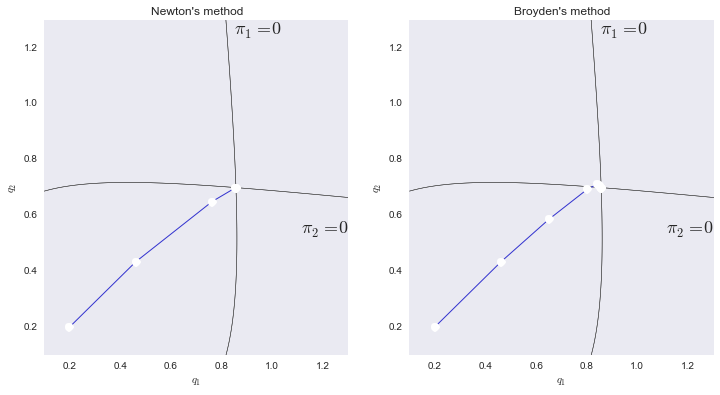

In [7]:
steps_options = {'marker': 'o',
                 'color': (0.2, 0.2, .81),
                 'linewidth': 1.0,
                 'markersize': 9,
                 'markerfacecolor': 'white',
                 'markeredgecolor': 'red'}

contour_options = {'levels': [0.0, 0.0],
                   'colors': '0.25',
                   'linewidths': 0.5}


Q1, Q2 = np.meshgrid(q1, q2)
Z0 = np.reshape(z[0], (n,n), order='F')
Z1 = np.reshape(z[1], (n,n), order='F')

methods = ['newton', 'broyden']
cournot_problem.opts['maxit', 'maxsteps', 'all_x'] = 10, 0, True

qmin, qmax = 0.1, 1.3

plt.figure(figsize=[12,6])
for it in range(2):
    x = cournot_problem.zero(method=methods[it])
    demo.subplot(1, 2, it + 1, methods[it].capitalize() + "'s method",
                 '$q_1$', '$q_2$', [qmin, qmax], [qmin, qmax])
    plt.contour(Q1, Q2, Z0, **contour_options)
    plt.contour(Q1, Q2, Z1, **contour_options)
    plt.plot(*cournot_problem.x_sequence, **steps_options)

    demo.text(0.85, qmax, '$\pi_1 = 0$', 'left', 'top')
    demo.text(qmax, 0.55, '$\pi_2 = 0$', 'right', 'center')
plt.show()